In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
heart = pd.read_csv(r'C:\Users\Dell\Documents\Cargo\Data sets\heart.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


    Demographic
        Sex: male or female(Nominal)
        Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept  of age is continuous)
    
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as  one can have any number of cigarettes, even half a cigarette.)
    
    Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
    
    Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous- In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

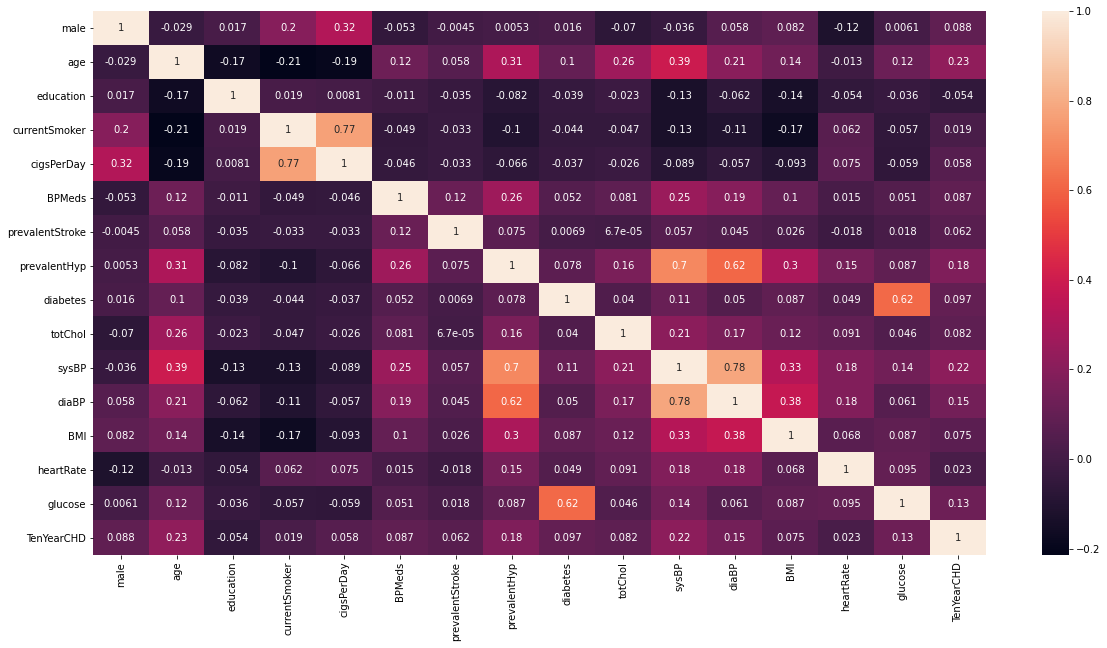

In [3]:
plt.figure(figsize = (20,10))       
sns.heatmap(heart.corr(),annot = True)
plt.show()

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
heart.shape

(4238, 16)

In [7]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
heart["education"].fillna(0, inplace=True)

In [9]:
df1 = heart.loc[heart.currentSmoker == 0]
#print(heart.isnull().sum())
df1.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              30
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             19
sysBP                0
diaBP                0
BMI                 12
heartRate            0
glucose            183
TenYearCHD           0
dtype: int64

In [10]:
m = heart['cigsPerDay'].mode()
m

0    0.0
dtype: float64

In [11]:
heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean(), inplace=True)

In [12]:
heart.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
heart['BPMeds'].describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [14]:
df = heart.loc[(heart.heartRate < 60) | (heart.heartRate >100)]
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              2
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             1
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose            37
TenYearCHD          0
dtype: int64

In [15]:
df[df.BPMeds != df.BPMeds]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
769,0,37,3.0,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0
1044,0,65,1.0,0,0.0,NaN,1,1,0,290.0,144.0,64.0,21.41,58.0,145.0,1


In [16]:
heart.at[1044,'BPMeds'] = 1
heart.at[769,'BPMeds'] = 0

In [17]:
heart.BPMeds.fillna(0, inplace=True)

In [18]:
heart.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [19]:
heart.totChol.describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [20]:
m = heart.totChol.mode()
heart.totChol.fillna(m[0], inplace=True)

In [21]:
heart[heart.heartRate != heart.heartRate]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [22]:
m = heart.heartRate.mode()
heart.heartRate.fillna(m[0], inplace=True)

In [23]:
m = heart.BMI.mode()
heart.BMI.fillna(m[0], inplace=True)

In [24]:
m = heart.glucose.mode()
heart.glucose.fillna(m[0], inplace=True)

In [25]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.929920,0.494101,9.003089,0.029495,0.005899,0.310524,0.025720,236.760264,132.352407,82.893464,25.785814,75.878716,81.328929,0.151958
std,0.495022,8.572160,1.053018,0.500024,11.879230,0.169209,0.076587,0.462763,0.158316,44.327866,22.038097,11.910850,4.078100,12.025185,22.924837,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.050000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [27]:
heart = heart.astype({'BPMeds': 'int64', 'cigsPerDay': 'int64', 'heartRate': 'int64'})
heart['BPMeds'].dtype ,heart['cigsPerDay'].dtype ,heart['heartRate'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

# LR

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
heart = heart.drop('education',axis=1)
heart = heart.drop('currentSmoker',axis=1)

In [30]:
X = heart.drop('TenYearCHD', axis=1 )
X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80,77.0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95,76.0
2,1,48,20,0,0,0,0,245.0,127.5,80.0,25.34,75,70.0
3,0,61,30,0,0,1,0,225.0,150.0,95.0,28.58,65,103.0
4,0,46,23,0,0,0,0,285.0,130.0,84.0,23.10,85,85.0


In [31]:
y= heart['TenYearCHD']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
heart.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80,77.0,0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95,76.0,0
2,1,48,20,0,0,0,0,245.0,127.5,80.0,25.34,75,70.0,0
3,0,61,30,0,0,1,0,225.0,150.0,95.0,28.58,65,103.0,1
4,0,46,23,0,0,0,0,285.0,130.0,84.0,23.10,85,85.0,0


In [34]:
scaler = StandardScaler()

X_train[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(X_train[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

X_train.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3491,1,0.501417,-0.496033,0,0,0,0,-1.435260,-0.529887,-0.335111,0.111503,-0.090713,-0.553945
3144,0,2.019926,-0.747440,1,0,1,0,1.310555,1.706355,0.515646,2.363578,-0.831232,-0.762644
1010,1,-0.900283,1.766630,0,0,0,0,-0.107366,-0.963444,-1.100793,0.626474,1.143485,-0.053068
1017,1,1.085459,-0.747440,0,0,0,0,-0.017339,-0.256061,0.005192,0.190350,-1.571751,0.197370
839,0,0.618226,-0.747440,0,0,0,0,0.162714,0.017764,-0.250036,-0.184174,-0.090713,-0.470466


In [35]:
heart_attack = (sum(heart['TenYearCHD'])/len(heart['TenYearCHD'].index))*100
heart_attack 

15.19584709768759

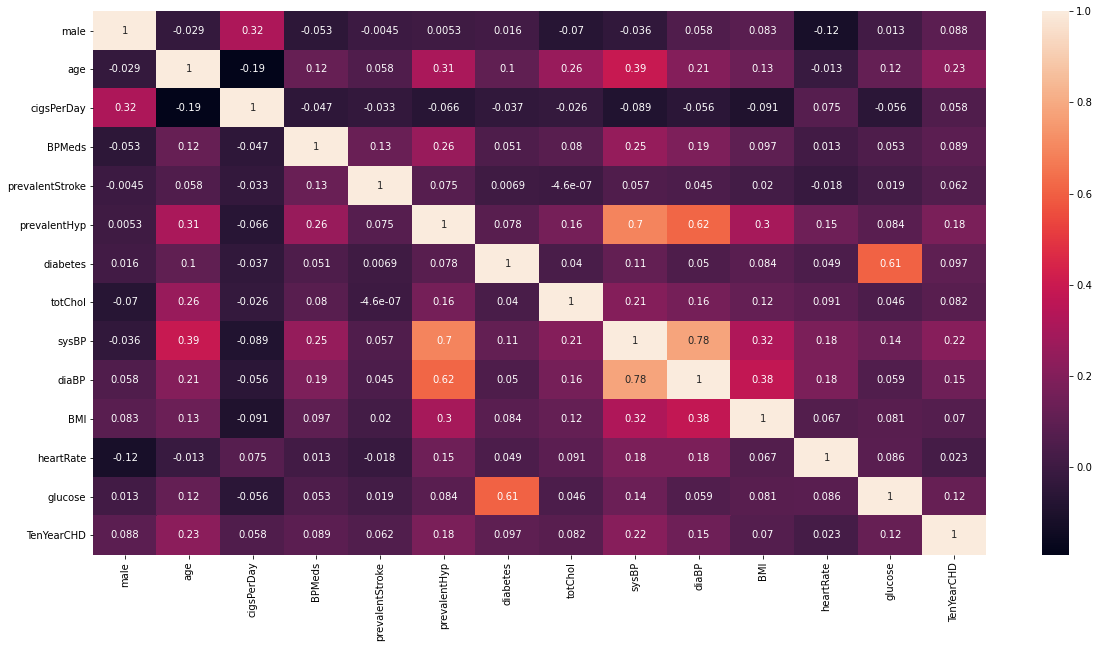

In [36]:
plt.figure(figsize = (20,10))       
sns.heatmap(heart.corr(),annot = True)
plt.show()

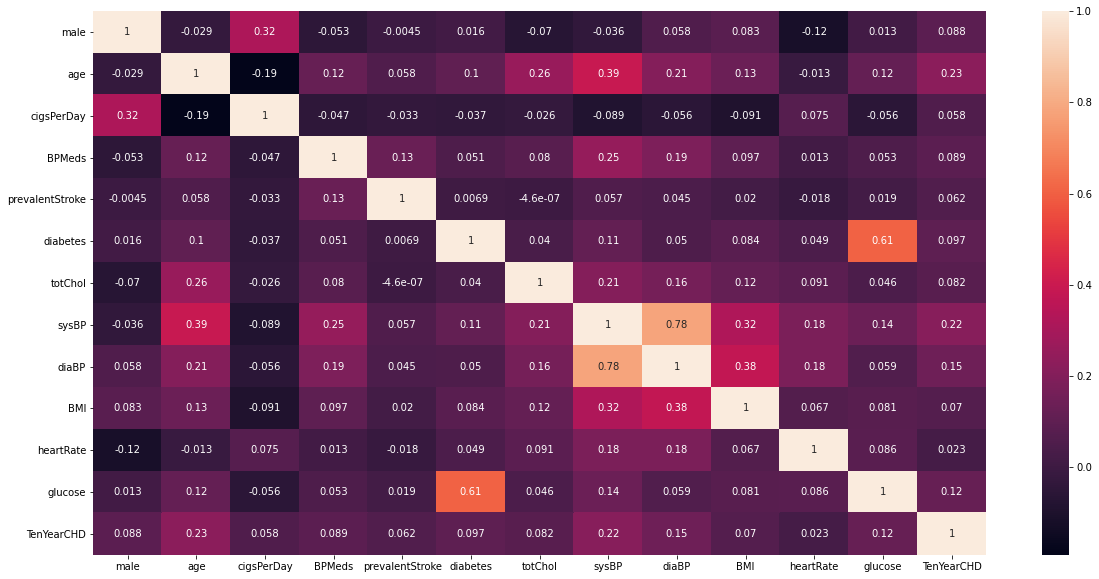

In [37]:
#X_test = X_test.drop('prevalentHyp', axis=1)
#X_train = X_train.drop('prevalentHyp', axis=1)
df = heart.drop('prevalentHyp', axis=1)
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)
plt.show()

with prevalentHyp

In [38]:
import statsmodels.api as sm

In [39]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                            GLM   Df Residuals:                     2952
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1160.2
Date:                Thu, 08 Jul 2021   Deviance:                       2320.3
Time:                        15:45:24   Pearson chi2:                 2.98e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2376      0.100    -22.407      0.000      -2.433      -2.042
male                0.6404      0.118      5.445      0.000       0.410       0.871
age                 0.4982      0.062      7.992      0.000       0.376       0.620
cigsPerDay          0.2156      0.054      3.977      0.000       0.109       0.322
BPMeds              0.3672      0.261      1.406      0.160      -0.145       0.879
prevalentStroke     1.0995      0.509      2.161      0.031       0.102       2.097
prevalentHyp        0.1016      0.152      0.670      0.503      -0.196       0.399
diabetes            0.5343      0.338      1.581      0.114      -0.128       1.196
totChol             0.1092      0.054      2.038      0.042       0.004       0.214
sysBP               0.3876      0.093      4.149      0.000       0.204       0.571
diaBP              -0.1022      0.084     -1.213      0.225      -0.267       0.063
BMI                 0.0129      0.056      0.230      0.818      -0.097       0.123
heartRate           0.0058      0.055      0.106      0.915      -0.101       0.113
glucose             0.1312      0.059      2.235      0.025       0.016       0.246
===================================================================================
"""

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('male', True, 1),
 ('age', True, 1),
 ('cigsPerDay', True, 1),
 ('BPMeds', True, 1),
 ('prevalentStroke', True, 1),
 ('prevalentHyp', True, 1),
 ('diabetes', True, 1),
 ('totChol', True, 1),
 ('sysBP', True, 1),
 ('diaBP', False, 2),
 ('BMI', False, 3),
 ('heartRate', False, 4),
 ('glucose', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['diaBP', 'BMI', 'heartRate'], dtype='object')

In [45]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                            GLM   Df Residuals:                     2952
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1160.2
Date:                Thu, 08 Jul 2021   Deviance:                       2320.3
Time:                        15:45:24   Pearson chi2:                 2.98e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2376      0.100    -22.407      0.000      -2.433      -2.042
male                0.6404      0.118      5.445      0.000       0.410       0.871
age                 0.4982      0.062      7.992      0.000       0.376       0.620
cigsPerDay          0.2156      0.054      3.977      0.000       0.109       0.322
BPMeds              0.3672      0.261      1.406      0.160      -0.145       0.879
prevalentStroke     1.0995      0.509      2.161      0.031       0.102       2.097
prevalentHyp        0.1016      0.152      0.670      0.503      -0.196       0.399
diabetes            0.5343      0.338      1.581      0.114      -0.128       1.196
totChol             0.1092      0.054      2.038      0.042       0.004       0.214
sysBP               0.3876      0.093      4.149      0.000       0.204       0.571
diaBP              -0.1022      0.084     -1.213      0.225      -0.267       0.063
BMI                 0.0129      0.056      0.230      0.818      -0.097       0.123
heartRate           0.0058      0.055      0.106      0.915      -0.101       0.113
glucose             0.1312      0.059      2.235      0.025       0.016       0.246
===================================================================================
"""

In [46]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3491    0.135412
3144    0.438758
1010    0.126773
1017    0.214158
839     0.108598
2240    0.121707
3349    0.133409
192     0.242206
4069    0.094537
2375    0.226339
dtype: float64

In [47]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13541229, 0.43875824, 0.12677268, 0.21415765, 0.10859803,
       0.12170666, 0.13340866, 0.24220585, 0.09453743, 0.22633888])

In [48]:
y_train_pred_final = pd.DataFrame({'Heart_Attack':y_train.values, 'Heart_Attack_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,Heart_Attack,Heart_Attack_prob,index
0,0,0.135412,3491
1,0,0.438758,3144
2,0,0.126773,1010
3,0,0.214158,1017
4,0,0.108598,839


In [49]:
y_train_pred_final['predicted'] = y_train_pred_final.Heart_Attack_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Heart_Attack,Heart_Attack_prob,index,predicted
0,0,0.135412,3491,0
1,0,0.438758,3144,0
2,0,0.126773,1010,0
3,0,0.214158,1017,0
4,0,0.108598,839,0


In [50]:
from sklearn import metrics

In [51]:
confusion = metrics.confusion_matrix(y_train_pred_final.Heart_Attack, y_train_pred_final.predicted )
print(confusion)

[[2467   21]
 [ 432   46]]


In [52]:
print(metrics.accuracy_score(y_train_pred_final.Heart_Attack, y_train_pred_final.predicted))

0.8472690492245448


# VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
col = X_train.columns
col

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,sysBP,3.69
9,diaBP,2.88
5,prevalentHyp,2.10
6,diabetes,1.66
12,glucose,1.65
0,male,1.44
1,age,1.36
10,BMI,1.18
2,cigsPerDay,1.15
3,BPMeds,1.13


In [56]:
col1 = col.drop('sysBP', 1)
col1

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,prevalentHyp,1.85
6,diabetes,1.66
11,glucose,1.64
8,diaBP,1.57
0,male,1.35
1,age,1.20
9,BMI,1.18
2,cigsPerDay,1.14
3,BPMeds,1.12
7,totChol,1.10


In [58]:
col = col1

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                            GLM   Df Residuals:                     2953
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1168.8
Date:                Thu, 08 Jul 2021   Deviance:                       2337.5
Time:                        15:45:25   Pearson chi2:                 2.95e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2758      0.099    -22.960      0.000      -2.470      -2.081
male                0.5696      0.116      4.925      0.000       0.343       0.796
age                 0.5802      0.059      9.781      0.000       0.464       0.697
cigsPerDay          0.2244      0.054      4.153      0.000       0.118       0.330
BPMeds              0.4898      0.255      1.919      0.055      -0.011       0.990
prevalentStroke     1.0075      0.508      1.985      0.047       0.013       2.002
prevalentHyp        0.3346      0.140      2.392      0.017       0.060       0.609
diabetes            0.5586      0.338      1.654      0.098      -0.103       1.221
totChol             0.1128      0.053      2.119      0.034       0.008       0.217
diaBP               0.1232      0.065      1.888      0.059      -0.005       0.251
BMI                 0.0106      0.056      0.190      0.849      -0.099       0.120
heartRate           0.0242      0.054      0.445      0.656      -0.082       0.131
glucose             0.1403      0.058      2.401      0.016       0.026       0.255
===================================================================================
"""

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.14082699, 0.41636881, 0.12422426, 0.22207495, 0.10271958,
       0.12565747, 0.14413723, 0.24700723, 0.08641013, 0.2460753 ])

In [62]:
y_train_pred_final1 = pd.DataFrame({'Heart_Attack':y_train.values, 'Heart_Attack_prob':y_train_pred})
y_train_pred_final1['index'] = y_train.index
y_train_pred_final1['predicted'] = y_train_pred_final.Heart_Attack_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final1.head()

,Heart_Attack,Heart_Attack_prob,index,predicted
0,0,0.140827,3491,0
1,0,0.416369,3144,0
2,0,0.124224,1010,0
3,0,0.222075,1017,0
4,0,0.102720,839,0


In [63]:
print(metrics.accuracy_score(y_train_pred_final.Heart_Attack, y_train_pred_final.predicted))

0.8472690492245448


In [64]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Heart_Attack, y_train_pred_final.predicted ) #(y,x)
confusion1

array([[2467,   21],
       [ 432,   46]], dtype=int64)

In [65]:
# with sysBP
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# without sysBP
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

In [66]:
#sensitivity
TP / float(TP+FN) , TP1 / float(TP1+FN1)

(0.09623430962343096, 0.09623430962343096)

In [67]:
#specificity
TN / float(TN+FP) , TN1 / float(TN1+FP1)

(0.9915594855305466, 0.9915594855305466)

In [68]:
# positive predictive value 
TP / float(TP+FP) , TP1 / float(TP1+FP1)

(0.6865671641791045, 0.6865671641791045)

In [69]:
# Negative predictive value
TN / float(TN+FN) , TN1 / float(TN1+FN1)

(0.8509830976198689, 0.8509830976198689)

ROC

In [70]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

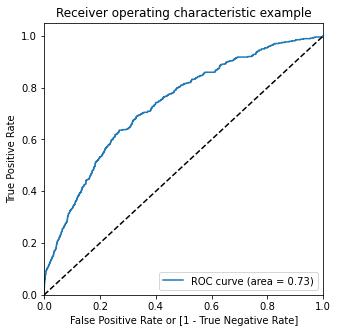

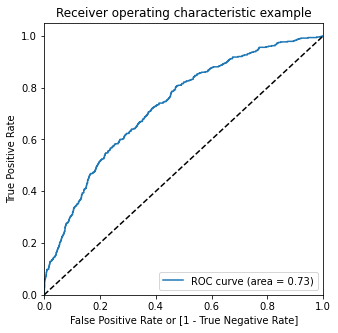

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Heart_Attack, y_train_pred_final.Heart_Attack_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Heart_Attack, y_train_pred_final.Heart_Attack_prob)
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final1.Heart_Attack, y_train_pred_final1.Heart_Attack_prob, drop_intermediate = False )
draw_roc(y_train_pred_final1.Heart_Attack, y_train_pred_final1.Heart_Attack_prob)

cutoff point

In [72]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Heart_Attack_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Heart_Attack,Heart_Attack_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.135412,3491,0,1,1,0,0,0,0,0,0,0,0
1,0,0.438758,3144,0,1,1,1,1,1,0,0,0,0,0
2,0,0.126773,1010,0,1,1,0,0,0,0,0,0,0,0
3,0,0.214158,1017,0,1,1,1,0,0,0,0,0,0,0
4,0,0.108598,839,0,1,1,0,0,0,0,0,0,0,0


In [73]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Heart_Attack, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.161160     1.000000     0.000000
0.1   0.1  0.495617     0.855649     0.426447
0.2   0.2  0.747471     0.554393     0.784566
0.3   0.3  0.816588     0.311715     0.913585
0.4   0.4  0.835469     0.152720     0.966640
0.5   0.5  0.847269     0.096234     0.991559
0.6   0.6  0.844572     0.046025     0.997990
0.7   0.7  0.842212     0.023013     0.999598
0.8   0.8  0.839514     0.006276     0.999598
0.9   0.9  0.839852     0.006276     1.000000


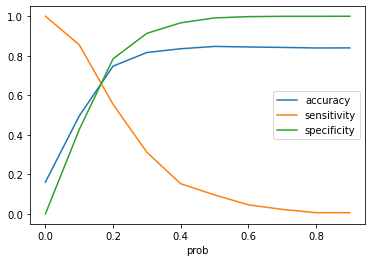

In [74]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Heart_Attack_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Heart_Attack,Heart_Attack_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.135412,3491,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.438758,3144,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.126773,1010,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.214158,1017,0,1,1,1,0,0,0,0,0,0,0,1
4,0,0.108598,839,0,1,1,0,0,0,0,0,0,0,0,0


In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Heart_Attack, y_train_pred_final.final_predicted )
confusion2

array([[1952,  536],
       [ 213,  265]], dtype=int64)

In [77]:
metrics.accuracy_score(y_train_pred_final.Heart_Attack, y_train_pred_final.final_predicted)

0.7474713418745785

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
#sensitivity
TP / float(TP+FN)

0.5543933054393305

In [80]:
# specificity
TN / float(TN+FP)

0.7845659163987139

In [81]:
# Positive predictive value 
print (TP / float(TP+FP))

0.33083645443196


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9016166281755197
